<a href="https://colab.research.google.com/github/Yee-Siang/DIGI-Team4/blob/main/%E6%99%BA%E9%82%A6%E4%BB%81%E5%AF%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#銷售量
!gdown --id '1rE1pXxnbYLHeNKZ4KQ_SAzsZ8XUZjST-' --output midstream.xlsx

Downloading...
From: https://drive.google.com/uc?id=1rE1pXxnbYLHeNKZ4KQ_SAzsZ8XUZjST-
To: /content/midstream.xlsx
100% 12.3k/12.3k [00:00<00:00, 21.8MB/s]


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_excel('midstream.xlsx')
rows = df.shape[0]

In [22]:
time_label = []
for i in range(1, rows):
    time_label.append(df.iat[i, 0])

In [23]:
midstream = []
accton = []
compal = []
name = ['accton', 'compal']
midstream.append(accton)
midstream.append(compal)
for j in range(2):
  for k in range(1, rows):
    midstream[j].append(df.iat[k, (2*j)+1])

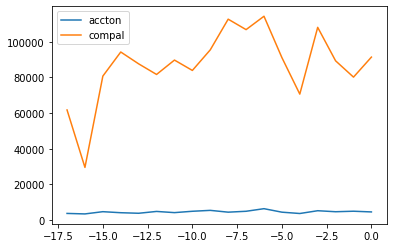

In [24]:
tl = []
for element in time_label:
  tl.append(int(element.split('年')[1][:-1]) + 12*int(element.split('年')[0][3])-18)

for k in range(2):
  plt.plot(tl, midstream[k], label = name[k])
plt.legend()
plt.show()

In [25]:
midstream_normed = []
for s in range(2):
  midstream_normed.append([])
for i in range(2):
  u = (sum(midstream[i])/len(midstream[i]))
  for ele in midstream[i]:
    midstream_normed[i].append((ele - u) / u)

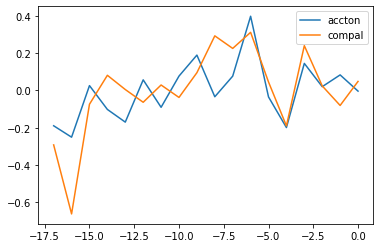

In [26]:
for k in range(2):
  plt.plot(tl, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

In [27]:
import statistics
std_compare = []
for i in range(2):
    std_compare.append(statistics.stdev(midstream_normed[i]))
std_compare

[0.1582691989065128, 0.22865388422330368]

In [28]:
#處理確診人數資訊
!gdown --id '151UEEw6bTO3g6JNdNFrpfPC2TAFUNk-0' --output china.xlsx
!gdown --id '12iGYZkq9uAcC8P4g5WNThqz76lg6EWWG' --output taiwan.xlsx
!gdown --id '1nglelEdrfH_fskn7m24FDc97Mn4hqh2v' --output america.xlsx
!gdown --id '14TFGjaWEDJ0CspVwCRO5BybxyAHLVs0x' --output europe.xlsx

Downloading...
From: https://drive.google.com/uc?id=151UEEw6bTO3g6JNdNFrpfPC2TAFUNk-0
To: /content/china.xlsx
100% 103k/103k [00:00<00:00, 912kB/s]
Downloading...
From: https://drive.google.com/uc?id=12iGYZkq9uAcC8P4g5WNThqz76lg6EWWG
To: /content/taiwan.xlsx
100% 110k/110k [00:00<00:00, 974kB/s]
Downloading...
From: https://drive.google.com/uc?id=1nglelEdrfH_fskn7m24FDc97Mn4hqh2v
To: /content/america.xlsx
100% 61.1k/61.1k [00:00<00:00, 967kB/s]
Downloading...
From: https://drive.google.com/uc?id=14TFGjaWEDJ0CspVwCRO5BybxyAHLVs0x
To: /content/europe.xlsx
100% 112k/112k [00:00<00:00, 982kB/s]


In [29]:
taiwan = pd.read_excel('taiwan.xlsx')
rows = taiwan.shape[0]
china = pd.read_excel('china.xlsx')
america = pd.read_excel('america.xlsx')
europe = pd.read_excel('europe.xlsx')
taiwan.iat[1, 5]

15637

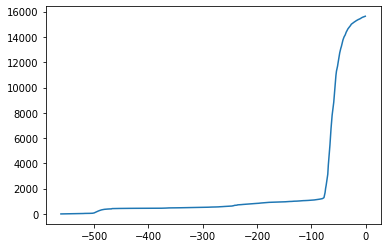

In [30]:
#Taiwan  Report
T = []
for i in range(1, taiwan.shape[0]):
  T.append(taiwan.iat[i, 5])
 
days = list(range(len(T)))
days.reverse()

r = len(T)
for k in range(r):
  days[k] -= r
plt.plot(days, T)

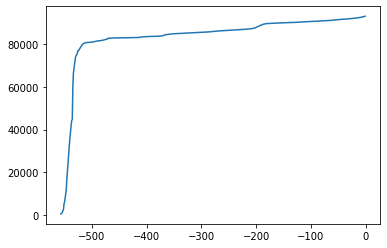

In [12]:
#China Report
C = []
for i in range(1, china.shape[0]):
  C.append(china.iat[i, 5])
 
days = list(range(len(C)))
days.reverse()

r = len(C)
for k in range(r):
  days[k] -= r
plt.plot(days, C)

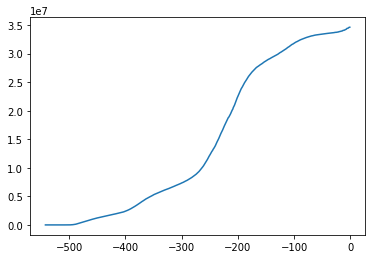

In [31]:
#America Report
A = []
for i in range(1, america.shape[0]):
  A.append(america.iat[i, 3])
 
days = list(range(len(A)))
days.reverse()

r = len(A)
for k in range(r):
  days[k] -= r
plt.plot(days, A)

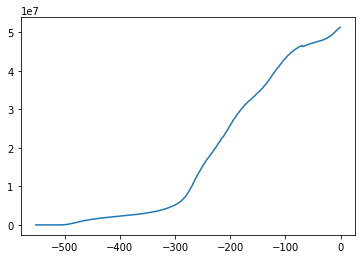

In [32]:
#Europe Report
E = []
for i in range(1, europe.shape[0]):
  E.append(europe.iat[i, 5])
 
days = list(range(len(E)))
days.reverse()

r = len(E)
for k in range(r):
  days[k] -= r
plt.plot(days, E)

In [33]:
#按月統計
from math import *
T_monthly = []
T_monthly_log = []
C_monthly = []
C_monthly_log = []
A_monthly = []
A_monthly_log = []
E_monthly = []
E_monthly_log = []

day = [16, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30]
count = 0
for ele in day:
  count += ele
  T_monthly.append(T[-1*count])
  T_monthly_log.append(log(T[-1*count]))
  C_monthly.append(C[-1*count])
  C_monthly_log.append(log(C[-1*count]))
  A_monthly.append(A[-1*count])
  A_monthly_log.append(log(A[-1*count]))
  E_monthly.append(E[-1*count])
  E_monthly_log.append(log(E[-1*count]))

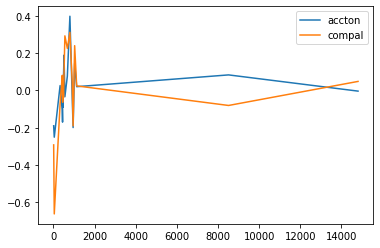

In [35]:
#營業額/疫情
for k in range(2):
  plt.plot(T_monthly, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

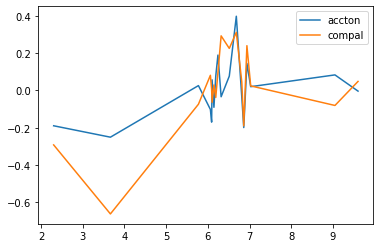

In [38]:
#Taiwan
for k in range(2):
  plt.plot(T_monthly_log, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

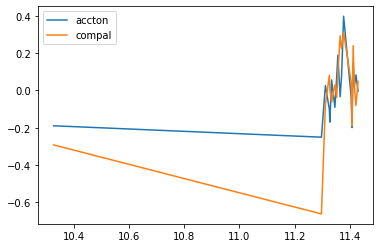

In [40]:
#china
for k in range(2):
  plt.plot(C_monthly_log, midstream_normed[k], label = name[k])
plt.legend()
plt.show()


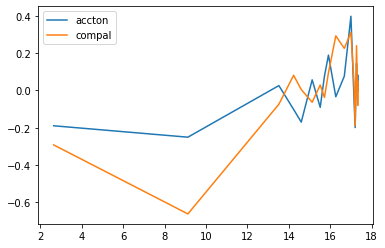

In [41]:
#america
for k in range(2):
  plt.plot(A_monthly_log, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

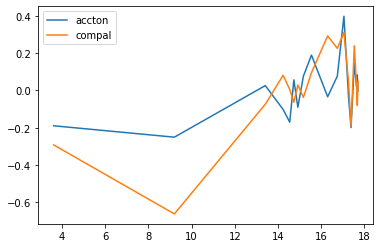

In [43]:
#europe
for k in range(2):
  plt.plot(E_monthly_log, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

In [45]:
#tw
import scipy.stats as stats
for i in range(2):
    print(name[i]+'營業額和台灣確診人數(log)的相關係數  =',stats.pearsonr(T_monthly_log, midstream_normed[i])[0])

accton營業額和台灣確診人數(log)的相關係數  = 0.42039149496470957
compal營業額和台灣確診人數(log)的相關係數  = 0.5042383683126562


In [46]:
#china
import scipy.stats as stats
for i in range(2):
    print(name[i]+'營業額和中國確診人數(log)的相關係數  =',stats.pearsonr(C_monthly_log, midstream_normed[i])[0])

accton營業額和中國確診人數(log)的相關係數  = 0.3403396228381395
compal營業額和中國確診人數(log)的相關係數  = 0.37162165846553175


In [47]:
#america
import scipy.stats as stats
for i in range(2):
    print(name[i]+'營業額和美國確診人數(log)的相關係數  =',stats.pearsonr(A_monthly_log, midstream_normed[i])[0])

accton營業額和美國確診人數(log)的相關係數  = 0.5077771226939798
compal營業額和美國確診人數(log)的相關係數  = 0.6408759832687202


In [48]:
#Europe
import scipy.stats as stats
for i in range(2):
    print(name[i]+'營業額和歐洲確診人數(log)的相關係數  =',stats.pearsonr(E_monthly_log, midstream_normed[i])[0])

accton營業額和歐洲確診人數(log)的相關係數  = 0.5041481947847164
compal營業額和歐洲確診人數(log)的相關係數  = 0.6462882450291915
